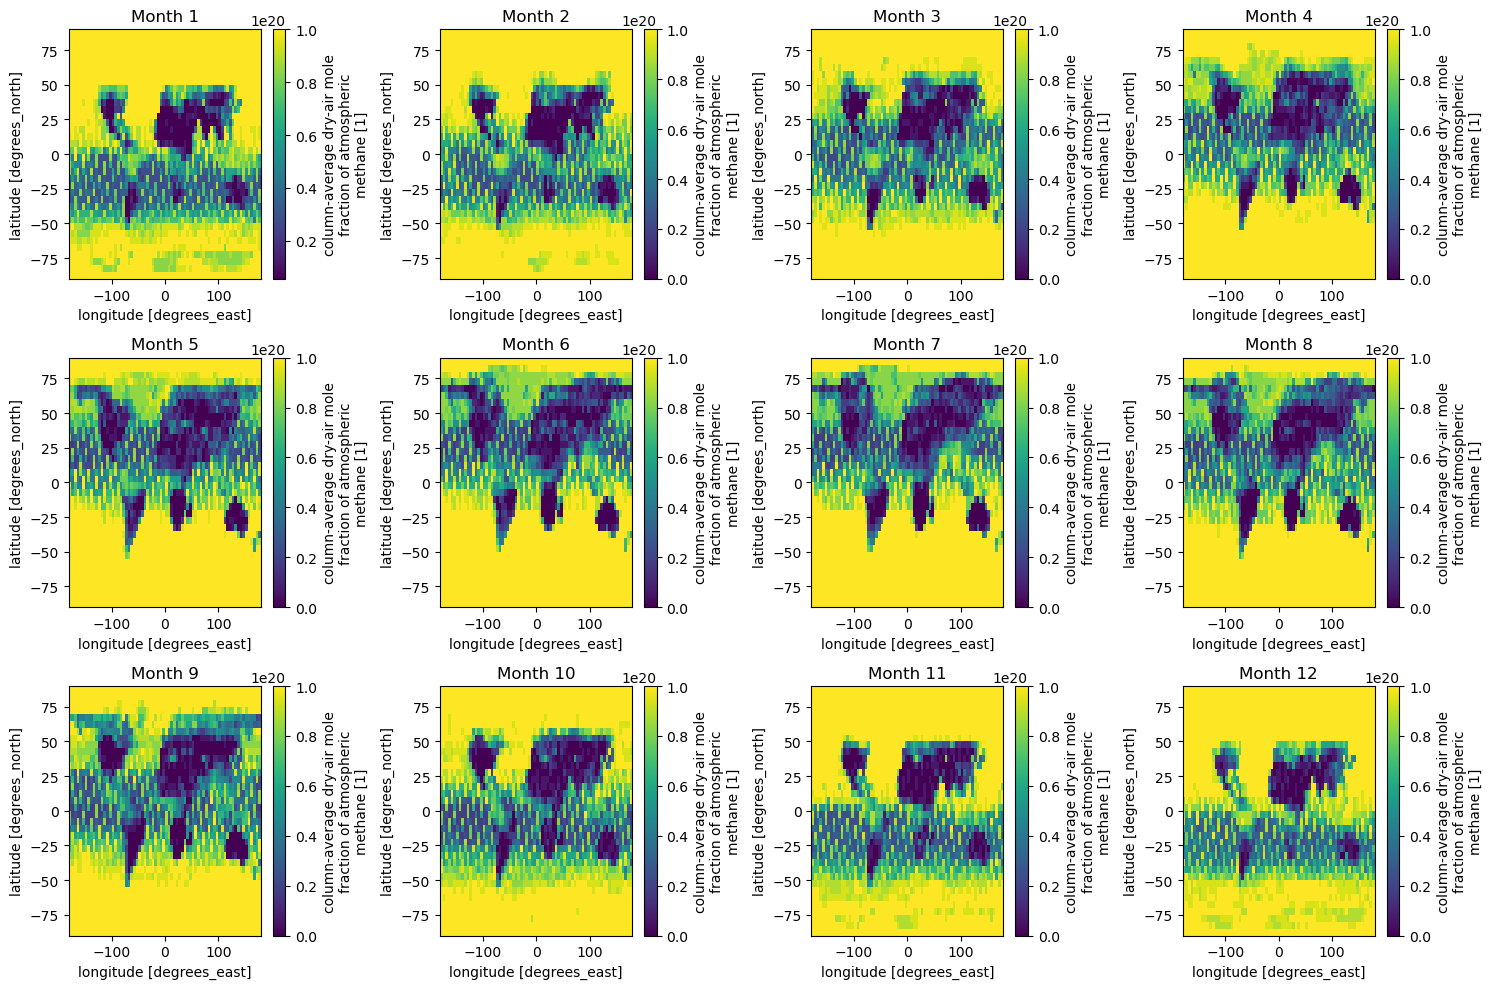

In [3]:
#1.1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

data = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc")
methane = data['xch4']  
time = data['time'] 
time = pd.to_datetime(time.values)
monthly_climatology = methane.groupby('time.month').mean('time')
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for i in range(12):
    ax = axes[i // 4, i % 4]
    monthly_climatology.isel(month=i).plot(ax=ax)
    ax.set_title(f"Month {i+1}")
plt.tight_layout()

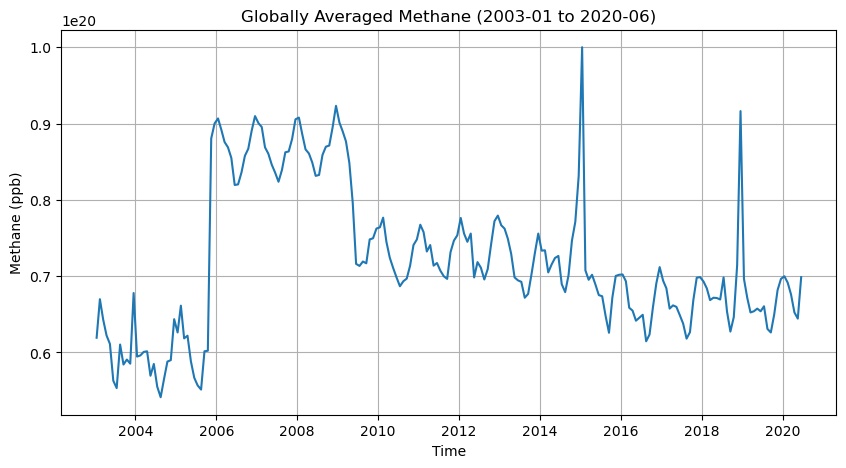

In [4]:
# 1.2 
global_methane = methane.mean(dim=['lat', 'lon'])
plt.figure(figsize=(10, 5))
plt.plot(time, global_methane)
plt.title("Globally Averaged Methane (2003-01 to 2020-06)")
plt.xlabel("Time")
plt.ylabel("Methane (ppb)")
plt.grid(True)
plt.show()

In [ ]:
#甲烷浓度逐年增加可能与农业活动燃料生产有关

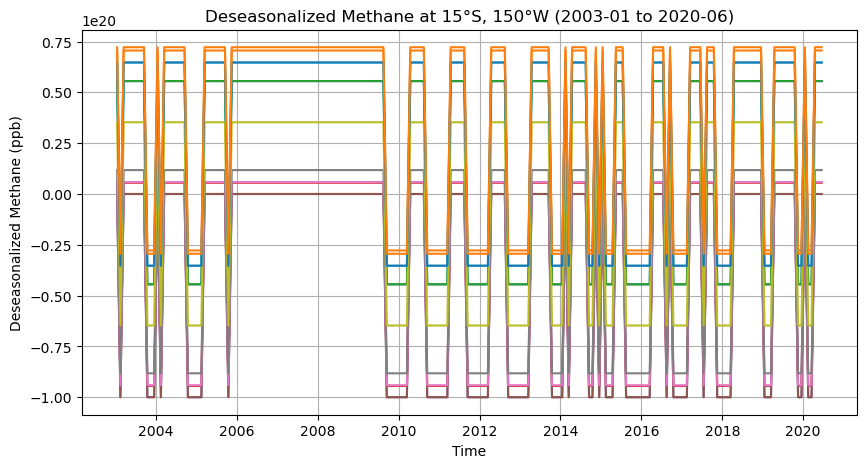

In [5]:
# 1.3 
point_methane = methane.sel(lat=-15, lon=-150, method='nearest')

point_climatology = point_methane.groupby('time.month').mean('time')

deseasonalized_methane = point_methane - point_climatology

plt.figure(figsize=(10, 5))
plt.plot(time, deseasonalized_methane)
plt.title("Deseasonalized Methane at 15°S, 150°W (2003-01 to 2020-06)")
plt.xlabel("Time")
plt.ylabel("Deseasonalized Methane (ppb)")
plt.grid(True)
plt.show()

In [ ]:
#去季节化的时间序列图展示了去除季节性变化后的甲烷浓度波动	可以观察到甲烷浓度的长周期变化趋势或异常波动，这些波动可能由全球气候变化、农业活动或工业排放等因素引起。

In [6]:
#2.1

ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')
sst = ds['sst']
nino34_region = sst.sel(
    lat=slice(-5, 5),
    lon=slice(190, 240)
)

nino34_sst = nino34_region.mean(dim=['lat', 'lon'])
monthly_climatology = nino34_sst.groupby('time.month').mean('time')
nino34_anomalies = nino34_sst.groupby('time.month') - monthly_climatology
print("Niño 3.4 区域月气候态和异常计算完成")
print(f"数据时间范围: {nino34_sst.time[0].values} 到 {nino34_sst.time[-1].values}")

Niño 3.4 区域月气候态和异常计算完成
数据时间范围: 1960-01-15T00:00:00.000000000 到 2016-12-15T00:00:00.000000000


In [8]:
import xarray as xr
import numpy as np
import pandas as pd
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')
sst = ds['sst']
print("原始数据信息:")
print(f"数据维度: {sst.dims}")
print(f"时间范围: {sst.time[0].values} 到 {sst.time[-1].values}")  # 修正这里
print(f"纬度范围: {sst.lat.min().values} 到 {sst.lat.max().values}")
print(f"经度范围: {sst.lon.min().values} 到 {sst.lon.max().values}")
nino34_region = sst.sel(
    lat=slice(-5, 5),
    lon=slice(190, 240)
)
print(f"\nNiño 3.4 区域维度: {nino34_region.dims}")
nino34_sst = nino34_region.mean(dim=['lat', 'lon'])
monthly_climatology = nino34_sst.groupby('time.month').mean('time')
nino34_anomalies = nino34_sst.groupby('time.month') - monthly_climatology
print("\n=== 1.1 计算结果 ===")
print(f"Niño 3.4 SST 时间序列长度: {len(nino34_sst)}")
print(f"月气候态计算完成 (12个月)")
print(f"异常时间序列长度: {len(nino34_anomalies)}")
print(f"\nNiño 3.4 区域平均SST统计:")
print(f"  最小值: {nino34_sst.min().values:.2f}°C")
print(f"  最大值: {nino34_sst.max().values:.2f}°C")
print(f"  平均值: {nino34_sst.mean().values:.2f}°C")

print(f"\nNiño 3.4 异常统计:")
print(f"  最小异常: {nino34_anomalies.min().values:.2f}°C")
print(f"  最大异常: {nino34_anomalies.max().values:.2f}°C")
print(f"  平均异常: {nino34_anomalies.mean().values:.2f}°C")
print(f"\n月气候态值 (°C):")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, month in enumerate(months, 1):
    clim_value = monthly_climatology.sel(month=i).values
    print(f"  {month}: {clim_value:.2f}")
print(f"\n结果变量:")
print(f"  - Niño 3.4 区域平均SST: nino34_sst")
print(f"  - 月气候态: monthly_climatology") 
print(f"  - 海温异常: nino34_anomalies")

原始数据信息:
数据维度: ('time', 'lat', 'lon')
时间范围: 1960-01-15T00:00:00.000000000 到 2016-12-15T00:00:00.000000000
纬度范围: -88.0 到 88.0
经度范围: 0.0 到 358.0

Niño 3.4 区域维度: ('time', 'lat', 'lon')

=== 1.1 计算结果 ===
Niño 3.4 SST 时间序列长度: 684
月气候态计算完成 (12个月)
异常时间序列长度: 684

Niño 3.4 区域平均SST统计:
  最小值: 24.43°C
  最大值: 29.40°C
  平均值: 27.04°C

Niño 3.4 异常统计:
  最小异常: -2.22°C
  最大异常: 2.70°C
  平均异常: 0.00°C

月气候态值 (°C):
  Jan: 26.57
  Feb: 26.74
  Mar: 27.24
  Apr: 27.69
  May: 27.80
  Jun: 27.60
  Jul: 27.20
  Aug: 26.82
  Sep: 26.74
  Oct: 26.72
  Nov: 26.69
  Dec: 26.61

结果变量:
  - Niño 3.4 区域平均SST: nino34_sst
  - 月气候态: monthly_climatology
  - 海温异常: nino34_anomalies


C:\Users\left\AppData\Local\Temp\ipykernel_158208\2603462384.py:38: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\left\AppData\Local\Temp\ipykernel_158208\2603462384.py:38: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\left\AppData\Local\Temp\ipykernel_158208\2603462384.py:38: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\left\AppData\Local\Temp\ipykernel_158208\2603462384.py:38: UserWarning: Glyph 34920 (\N{CJK UNIFIED IDEOGRAPH-8868}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\left\AppData\Local\Temp\ipykernel_158208\2603462384.py:38: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\left\AppData\Local\Temp\ipykernel_158208\2603462384.py:38: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6})

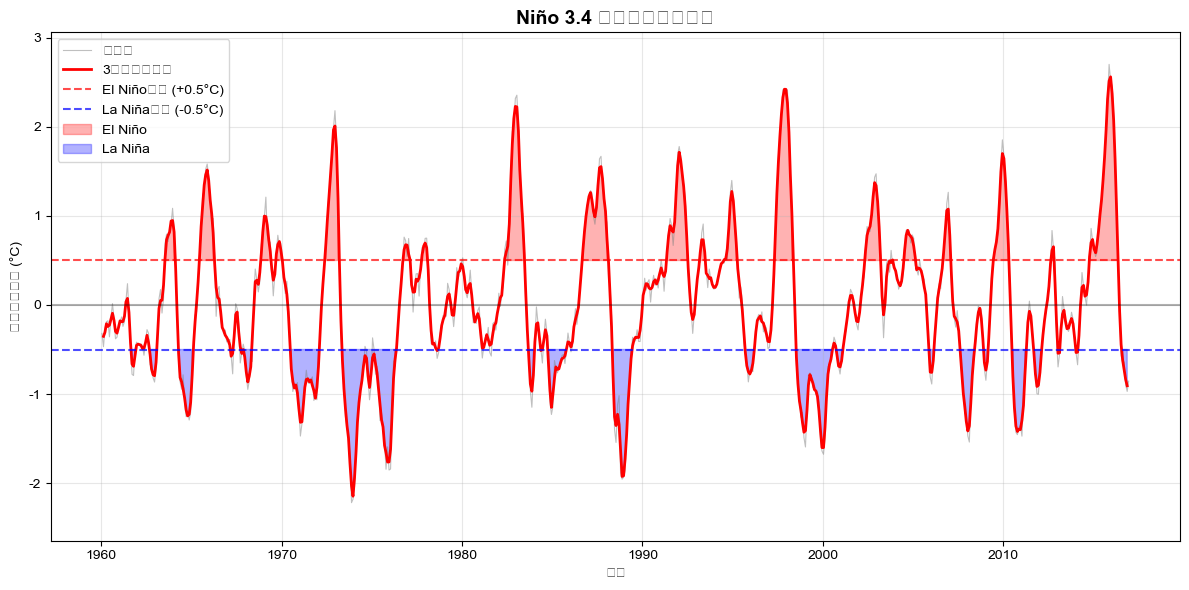


=== 1.2 可视化结果 ===
Niño 3.4 指数范围: -2.15°C 到 2.56°C
3个月滑动平均序列长度: 684
检测到El Niño事件: 174个月超过阈值
最强El Niño: 2.56°C
检测到La Niña事件: 188个月超过阈值
最强La Niña: -2.15°C


In [9]:
import matplotlib.pyplot as plt

nino34_3month = nino34_anomalies.rolling(time=3, center=True).mean()

plt.figure(figsize=(12, 6))

plt.plot(nino34_anomalies.time, nino34_anomalies, 
         color='gray', alpha=0.5, linewidth=0.8, label='月异常')
plt.plot(nino34_3month.time, nino34_3month, 
         color='red', linewidth=2, label='3个月滑动平均')

plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='El Niño阈值 (+0.5°C)')
plt.axhline(y=-0.5, color='blue', linestyle='--', alpha=0.7, label='La Niña阈值 (-0.5°C)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.fill_between(nino34_3month.time, 0.5, nino34_3month, 
                 where=(nino34_3month >= 0.5), color='red', alpha=0.3, label='El Niño')
plt.fill_between(nino34_3month.time, -0.5, nino34_3month, 
                 where=(nino34_3month <= -0.5), color='blue', alpha=0.3, label='La Niña')

plt.title('Niño 3.4 海表温度异常指数', fontsize=14, fontweight='bold')
plt.ylabel('海表温度异常 (°C)')
plt.xlabel('时间')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

y_min = min(-2.5, nino34_3month.min().values - 0.5)
y_max = max(2.5, nino34_3month.max().values + 0.5)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

print("\n=== 1.2 可视化结果 ===")
print(f"Niño 3.4 指数范围: {nino34_3month.min().values:.2f}°C 到 {nino34_3month.max().values:.2f}°C")
print(f"3个月滑动平均序列长度: {len(nino34_3month)}")

el_nino_events = nino34_3month.where(nino34_3month >= 0.5, drop=True)
la_nina_events = nino34_3month.where(nino34_3month <= -0.5, drop=True)

if len(el_nino_events) > 0:
    print(f"检测到El Niño事件: {len(el_nino_events)}个月超过阈值")
    print(f"最强El Niño: {el_nino_events.max().values:.2f}°C")
    
if len(la_nina_events) > 0:
    print(f"检测到La Niña事件: {len(la_nina_events)}个月超过阈值")
    print(f"最强La Niña: {la_nina_events.min().values:.2f}°C")

E:\ancon\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
E:\ancon\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


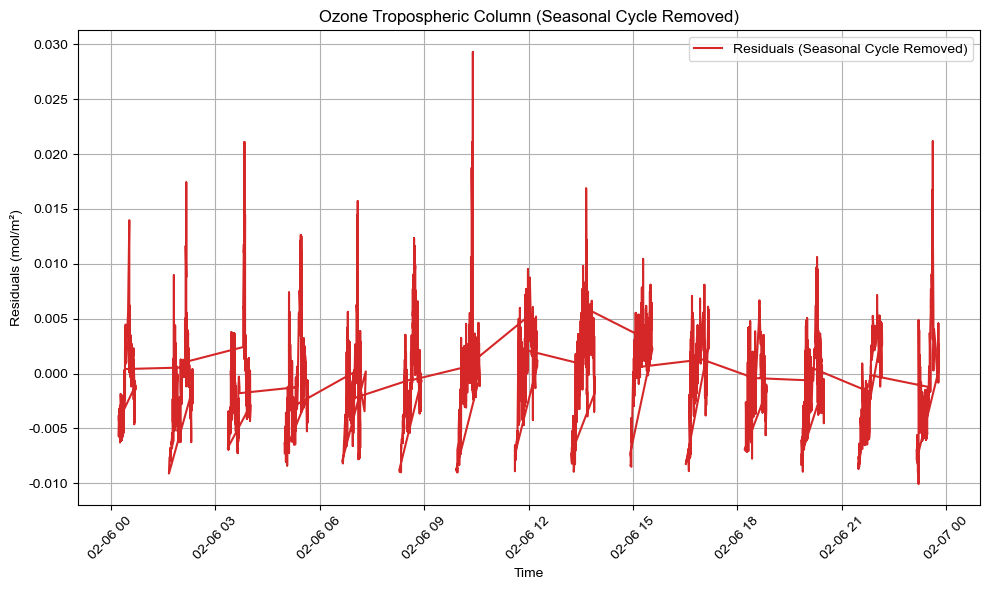

In [12]:
#3.1

dataset = xr.open_dataset('TROPESS_AIRS-Aqua_OMI-Aura_L2_Summary_O3_20210206_MUSES_R1p11_FS_F0p6.nc')


time_data = dataset['time'].values
col_t = dataset['col_t'].values


time_pd = pd.to_datetime(time_data)

months = time_pd.month
monthly_means = [np.mean(col_t[months == m]) for m in range(1, 13)]
seasonal_cycle = np.array([monthly_means[m - 1] for m in months])

residuals = col_t - seasonal_cycle

plt.figure(figsize=(10, 6))
plt.plot(time_pd, residuals, label="Residuals (Seasonal Cycle Removed)", color='tab:red')
plt.title("Ozone Tropospheric Column (Seasonal Cycle Removed)")
plt.xlabel("Time")
plt.ylabel("Residuals (mol/m²)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

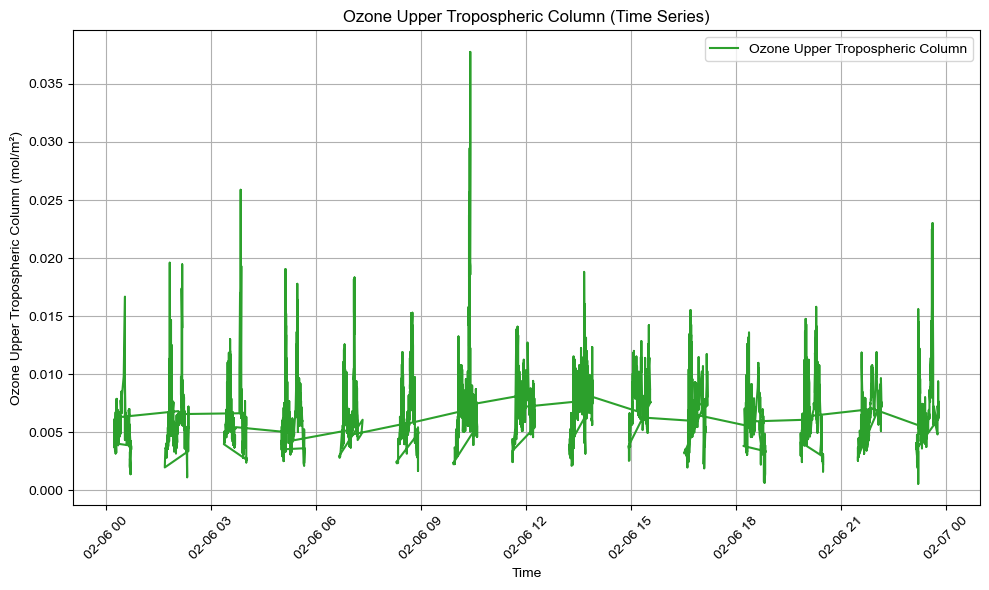

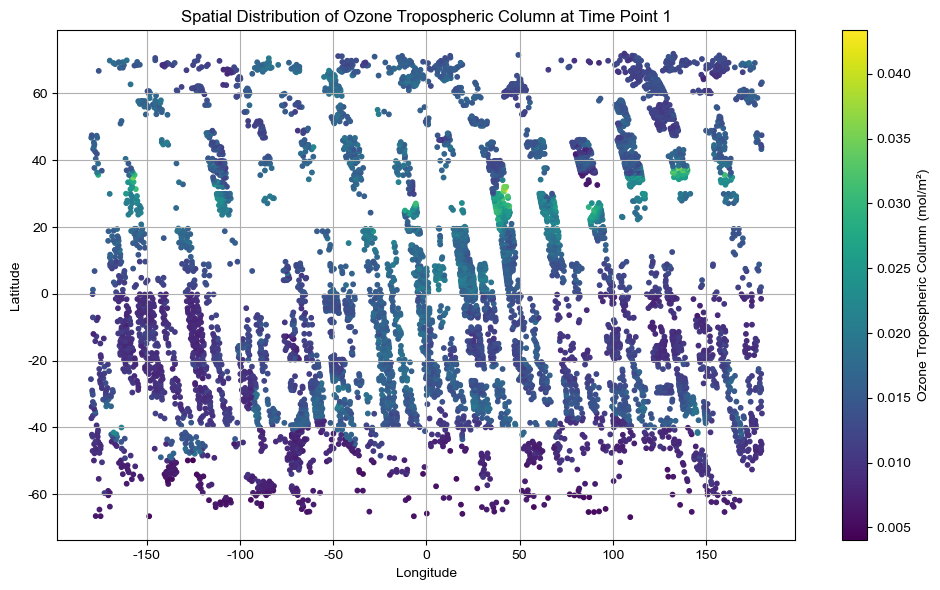

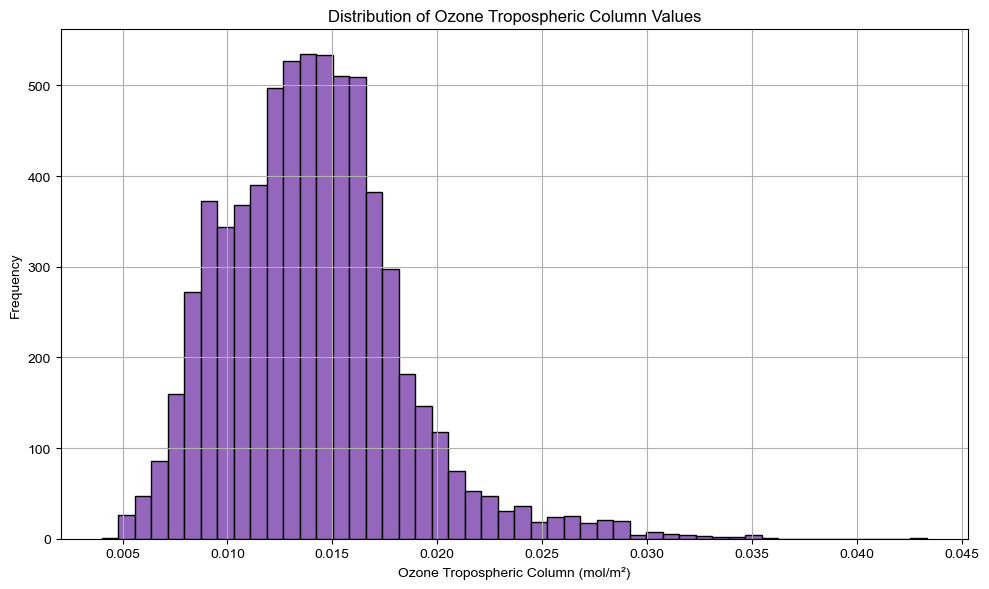

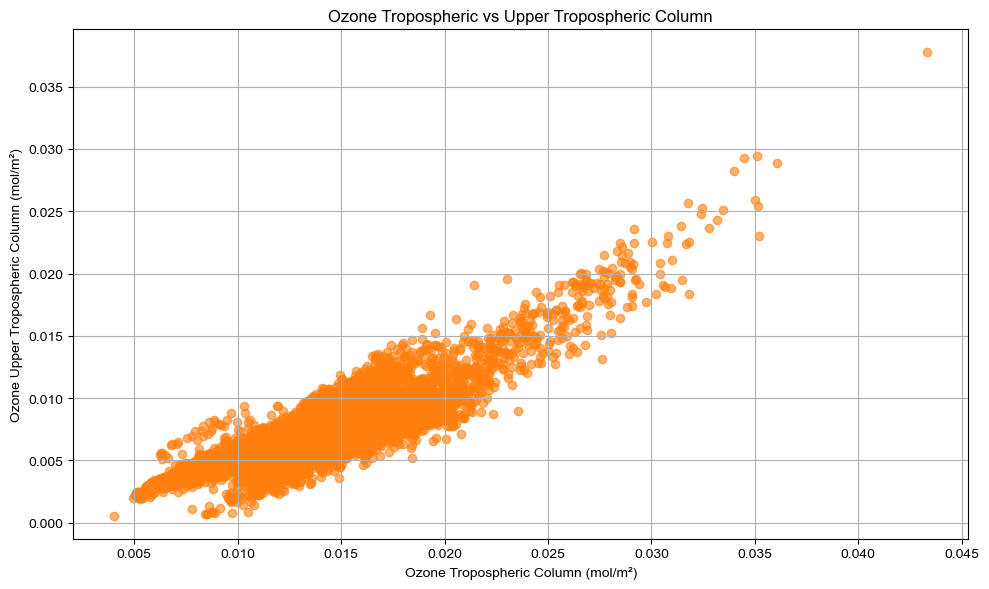

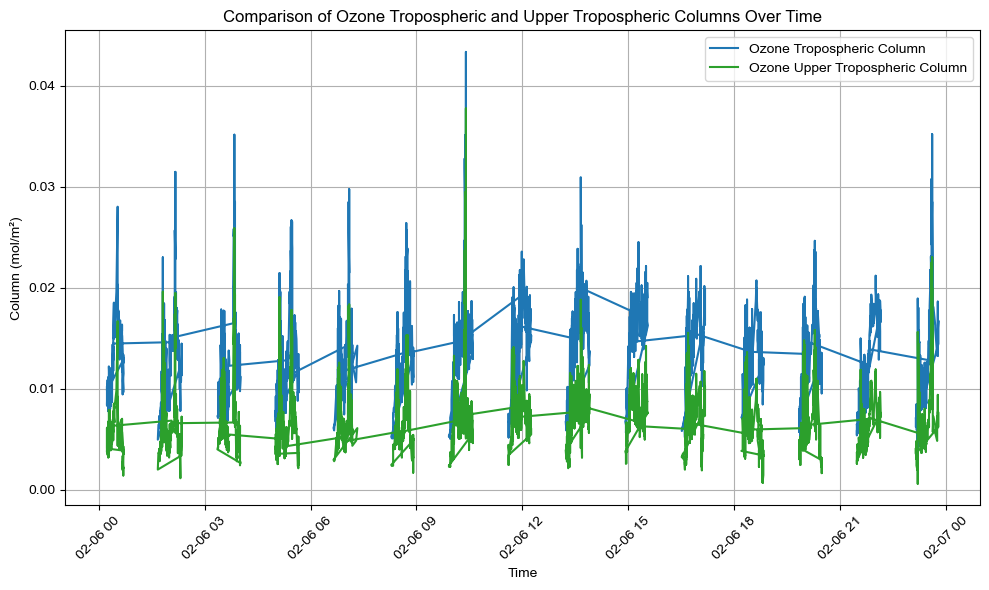

In [13]:
#3.2
plt.figure(figsize=(10, 6))
plt.plot(time_pd, dataset['col_ut'].values, label="Ozone Upper Tropospheric Column", color='tab:green')
plt.title("Ozone Upper Tropospheric Column (Time Series)")
plt.xlabel("Time")
plt.ylabel("Ozone Upper Tropospheric Column (mol/m²)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

latitudes = dataset['latitude'].values
longitudes = dataset['longitude'].values
ozone_values = dataset['col_t'].values

plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=ozone_values, cmap='viridis', s=10)
plt.colorbar(label="Ozone Tropospheric Column (mol/m²)")
plt.title("Spatial Distribution of Ozone Tropospheric Column at Time Point 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(col_t, bins=50, color='tab:purple', edgecolor='black')
plt.title("Distribution of Ozone Tropospheric Column Values")
plt.xlabel("Ozone Tropospheric Column (mol/m²)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(col_t, dataset['col_ut'].values, color='tab:orange', alpha=0.6)
plt.title("Ozone Tropospheric vs Upper Tropospheric Column")
plt.xlabel("Ozone Tropospheric Column (mol/m²)")
plt.ylabel("Ozone Upper Tropospheric Column (mol/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_pd, col_t, label="Ozone Tropospheric Column", color='tab:blue')
plt.plot(time_pd, dataset['col_ut'].values, label="Ozone Upper Tropospheric Column", color='tab:green')
plt.title("Comparison of Ozone Tropospheric and Upper Tropospheric Columns Over Time")
plt.xlabel("Time")
plt.ylabel("Column (mol/m²)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()